In [ ]:
# Препроцессинг. В том случае, еслои необходимо переименовать классы программным образом, а также проверить расположение меток
import os
import shutil

# Исходная и целевая папки
source_folder = '/'
target_folder = '/content/13.images/'

# Получение списка всех файлов в исходной папке
all_files = os.listdir(source_folder)

# Перебор всех файлов
for file_name in all_files:
    print(f"Checking file: {file_name}")
    if file_name.endswith('.jpg') and 'rf' in file_name:
        print(f"Moving file: {file_name}")
        # Полный путь к файлу
        source = os.path.join(source_folder, file_name)

        # Полный путь к целевой папке
        target = os.path.join(target_folder, file_name)

        # Перемещение файла
        shutil.move(source, target)

print("Files moved.")


In [ ]:
# Исходная и целевая папки
source_folder = '/content'
target_folder = '/content/13.labels/'

# Получение списка всех файлов в исходной папке
all_files = os.listdir(source_folder)

# Перебор всех файлов
for file_name in all_files:
    print(f"Checking file: {file_name}")
    if file_name.endswith('.txt') and 'rf' in file_name:
        print(f"Moving file: {file_name}")
        # Полный путь к файлу
        source = os.path.join(source_folder, file_name)

        # Полный путь к целевой папке
        target = os.path.join(target_folder, file_name)

        # Перемещение файла
        shutil.move(source, target)

print("Files moved.")

In [ ]:
images_dir = '/content/13.images'
labels_dir = '/content/13.labels'


Selected image: /content/13.images/ng1_frame0710_png.rf.e3a78db916795983df87de34c54cfed5.jpg
Base name: ng1_frame0710_png.rf.e3a78db916795983df87de34c54cfed5
Selected label file: /content/13.labels/ng1_frame0710_png.rf.9add17d7034275e4c275493df75a0940.txt


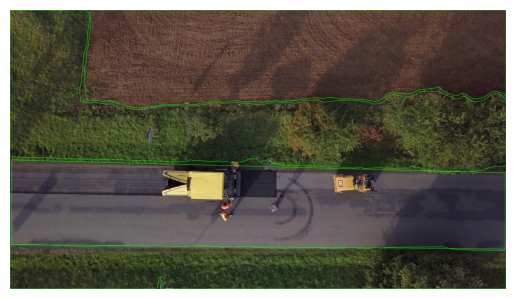

In [ ]:




class_names = ['agricultural facility', 'field', 'forest', 'grassland', 'industrial facility', 'other', 'power line', 'public facility', 'road', 'water']


def display_image_with_labels(image_path, label_path, class_names):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        class_name = class_names[class_id]
        coords = np.array(parts[1:], dtype=np.float32)
        coords = coords.reshape(-1, 2)

        h, w = image.shape[:2]
        coords[:, 0] *= w
        coords[:, 1] *= h
        coords = coords.astype(np.int32)

        cv2.polylines(image, [coords], isClosed=True, color=(0, 255, 0), thickness=2)
        cv2.putText(image, class_name, tuple(coords[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    plt.imshow(image)
    plt.axis('off')
    plt.show()


def display_random_image_with_labels(images_dir, labels_dir, class_names):
    image_files = os.listdir(images_dir)
    label_files = os.listdir(labels_dir)

    random_index = random.randint(0, len(image_files) - 1)
    sample_image_path = os.path.join(images_dir, image_files[random_index])
    base_name = os.path.splitext(os.path.basename(sample_image_path))[0]

    print(f"Selected image: {sample_image_path}")  # Debug
    print(f"Base name: {base_name}")  # Debug

    corresponding_label_file = None
    pattern = re.compile(re.escape(base_name.split('_png')[0]))  # Создаем шаблон для поиска

    for label_file in label_files:
        if pattern.match(label_file):  # Ищем совпадение
            corresponding_label_file = label_file
            break

    if corresponding_label_file is None:
        print("No corresponding label file found.")
        return

    sample_label_path = os.path.join(labels_dir, corresponding_label_file)
    print(f"Selected label file: {sample_label_path}")  # Debug

    display_image_with_labels(sample_image_path, sample_label_path, class_names)


display_random_image_with_labels(images_dir, labels_dir, class_names)